In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [3]:
df = pd.read_csv("/Users/minsu/Desktop/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [4]:
# 범주형 데이터 Sex를 숫자로 인코딩
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Sex']

id
0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int64

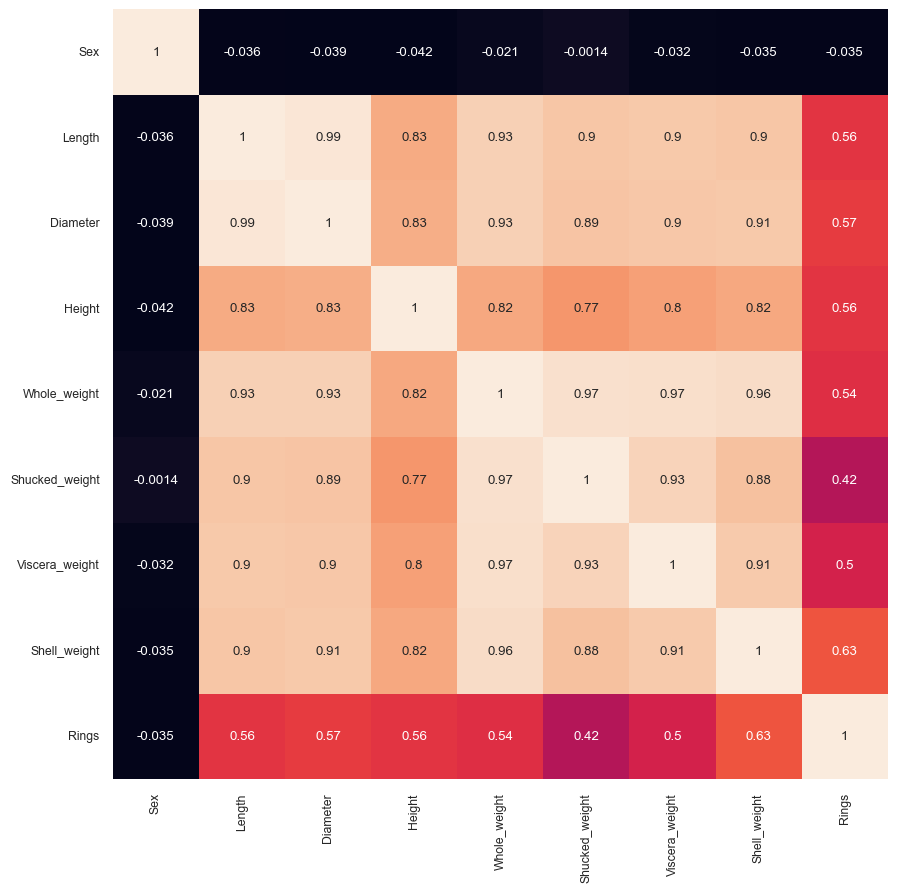

In [5]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

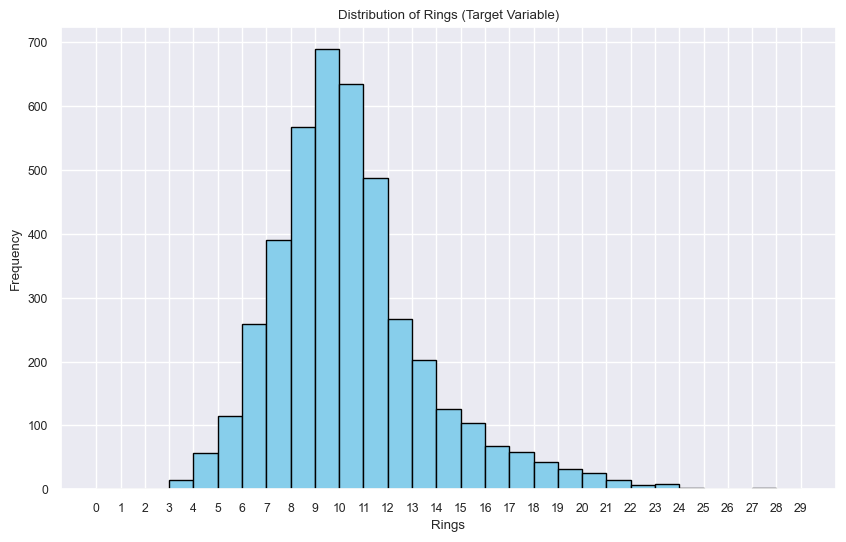

In [10]:
bins = np.arange(0, df['Rings'].max() + 1)

plt.figure(figsize=(10, 6))
plt.hist(df['Rings'], bins=bins, color='skyblue', edgecolor='black')
plt.xticks(bins)  # x축에 모든 구간 값 표시
plt.title('Distribution of Rings (Target Variable)')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
X = df.drop(columns=['Rings']).values
X

array([[2.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [2.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [2.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [2.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [14]:
y = df['Rings'].values
y

array([15,  7,  9, ...,  9, 10, 12])

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [18]:
X = X.reshape(X.shape[0], X.shape[1], 1)
X

array([[[ 1.15198011],
        [-0.57455813],
        [-0.43214879],
        ...,
        [-0.60768536],
        [-0.72621157],
        [-0.63821689]],

       [[ 1.15198011],
        [-1.44898585],
        [-1.439929  ],
        ...,
        [-1.17090984],
        [-1.20522124],
        [-1.21298732]],

       [[-1.28068972],
        [ 0.05003309],
        [ 0.12213032],
        ...,
        [-0.4634999 ],
        [-0.35668983],
        [-0.20713907]],

       ...,

       [[ 1.15198011],
        [ 0.6329849 ],
        [ 0.67640943],
        ...,
        [ 0.74855917],
        [ 0.97541324],
        [ 0.49695471]],

       [[-1.28068972],
        [ 0.84118198],
        [ 0.77718745],
        ...,
        [ 0.77334105],
        [ 0.73362741],
        [ 0.41073914]],

       [[ 1.15198011],
        [ 1.54905203],
        [ 1.48263359],
        ...,
        [ 2.64099341],
        [ 1.78744868],
        [ 1.84048058]]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from tensorflow.keras.layers import Input
# CNN Model
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # 회귀 모델이므로 출력 노드는 1개
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

2024-09-24 17:51:14.163536: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-09-24 17:51:14.163572: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-24 17:51:14.163581: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-24 17:51:14.163609: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-24 17:51:14.163629: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 7, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,417 (32.88 KB)

 Trainable params: 8,417 (32.88 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20


2024-09-24 17:51:37.010995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 79.1237 - mae: 7.9746 - val_loss: 15.6302 - val_mae: 3.0690
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 18.1110 - mae: 2.9686 - val_loss: 7.4632 - val_mae: 1.9720
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 10.1346 - mae: 2.1438 - val_loss: 6.1278 - val_mae: 1.8570
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.3835 - mae: 1.9767 - val_loss: 5.8380 - val_mae: 1.7053
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.0350 - mae: 2.0379 - val_loss: 5.4640 - val_mae: 1.6778
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.3537 - mae: 1.9605 - val_loss: 5.4995 - val_mae: 1.6425
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.5503 - mae: 1.9672 - val_loss: 5.6238 - val_mae: 1.8242
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.3451 - mae: 1.9258 - val_loss: 5.5502 - val_mae: 1.7166
Epoch 9/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.5852 - mae: 2.0083

In [32]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1733 - mae: 1.6769
Test MAE: 1.64


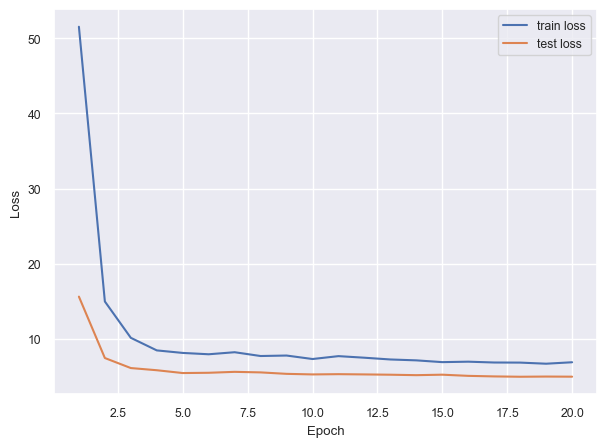

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

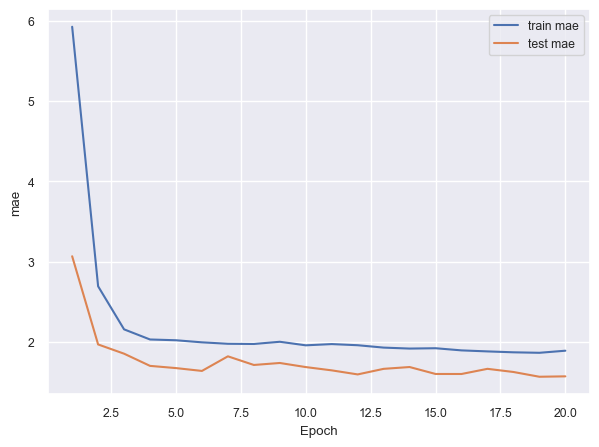

In [38]:
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, mae, label='train mae')
plt.plot(epochs, val_mae, label='test mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend()
plt.show()

# Epochs 증가

In [41]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.4097 - mae: 1.8471 - val_loss: 4.8550 - val_mae: 1.5886
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.8818 - mae: 1.8940 - val_loss: 5.0136 - val_mae: 1.5763
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.1154 - mae: 1.7894 - val_loss: 4.8771 - val_mae: 1.6348
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.8837 - mae: 1.9079 - val_loss: 4.8505 - val_mae: 1.5866
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.6460 - mae: 1.9707 - val_loss: 4.8492 - val_mae: 1.6067
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.8071 - mae: 1.8874 - val_loss: 4.9871 - val_mae: 1.5555
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.9162 - mae: 1.7835 - val_loss: 4.9889 - val_mae: 1.5697
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.3722 - mae: 1.8260 - val_loss: 4.9415 - val_mae: 1.5654
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.4183 - mae: 

In [43]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8574 - mae: 1.5674
Test MAE: 1.58


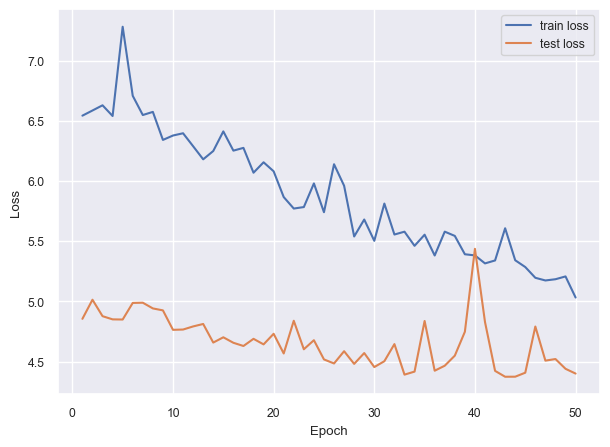

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

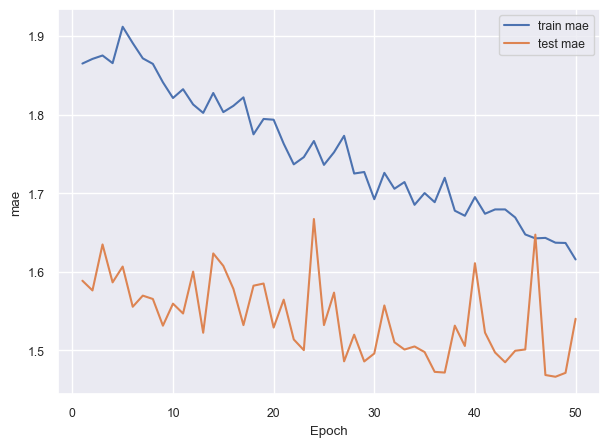

In [47]:
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, mae, label='train mae')
plt.plot(epochs, val_mae, label='test mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend()
plt.show()

# L2

In [54]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # L2 정규화 추가
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # L2 정규화 추가
    Dense(1)  # 회귀 모델이므로 출력 노드는 1개
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 훈련
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 76.4366 - mae: 7.6612 - val_loss: 15.3884 - val_mae: 2.8679
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 13.8973 - mae: 2.5925 - val_loss: 8.3018 - val_mae: 2.0315
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.3562 - mae: 1.9156 - val_loss: 7.4042 - val_mae: 1.8917
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8184 - mae: 1.8046 - val_loss: 6.6895 - val_mae: 1.7017
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.7384 - mae: 1.8102 - val_loss: 6.7650 - val_mae: 1.7999
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.6151 - mae: 1.8033 - val_loss: 6.3696 - val_mae: 1.7139
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.1709 - mae: 1.7578 - val_loss: 6.2389 - val_mae: 1.6786
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.9555 - mae: 1.7794 - val_loss: 6.1736 - val_mae: 1.7022
Epoch 9/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.5847 - mae: 1.7237 -

In [56]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.4443 - mae: 1.7455 - val_loss: 5.7410 - val_mae: 1.6687
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.5527 - mae: 1.7263 - val_loss: 5.6555 - val_mae: 1.5943
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.4489 - mae: 1.7142 - val_loss: 5.6330 - val_mae: 1.5727
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.3891 - mae: 1.7042 - val_loss: 5.5168 - val_mae: 1.5880
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.1942 - mae: 1.6804 - val_loss: 5.5119 - val_mae: 1.6309
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.1979 - mae: 1.6870 - val_loss: 5.6398 - val_mae: 1.5469
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.1523 - mae: 1.7236 - val_loss: 5.6119 - val_mae: 1.7028
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.0272 - mae: 1.6739 - val_loss: 5.4351 - val_mae: 1.5869
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.2114 - mae: 

In [58]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.2f}")
print(f"Test MAE: {test_mae:.2f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0099 - mae: 1.5820
Test Loss: 5.61
Test MAE: 1.54


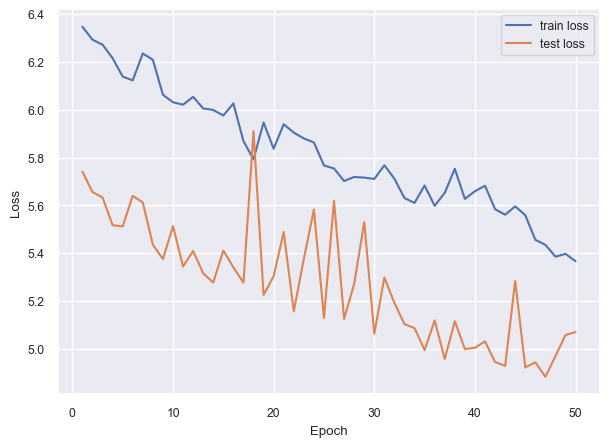

In [62]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

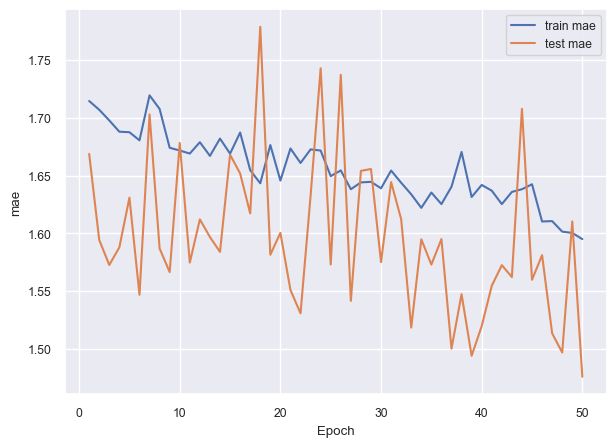

In [60]:
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, mae, label='train mae')
plt.plot(epochs, val_mae, label='test mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend()
plt.show()

# Learning Rate 조절 Default -> 0.0001

In [66]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1853 - mae: 1.5614 - val_loss: 4.8224 - val_mae: 1.5003
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.1194 - mae: 1.5541 - val_loss: 4.8751 - val_mae: 1.5164
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.1351 - mae: 1.5586 - val_loss: 4.8686 - val_mae: 1.5389
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.0579 - mae: 1.5601 - val_loss: 4.8740 - val_mae: 1.5527
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.4053 - mae: 1.5956 - val_loss: 4.8394 - val_mae: 1.5270
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.1004 - mae: 1.5432 - val_loss: 4.8256 - val_mae: 1.5185
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.2259 - mae: 1.5722 - val_loss: 4.9001 - val_mae: 1.5638
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.9396 - mae: 1.5485 - val_loss: 4.8279 - val_mae: 1.5121
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.0070 - mae: 

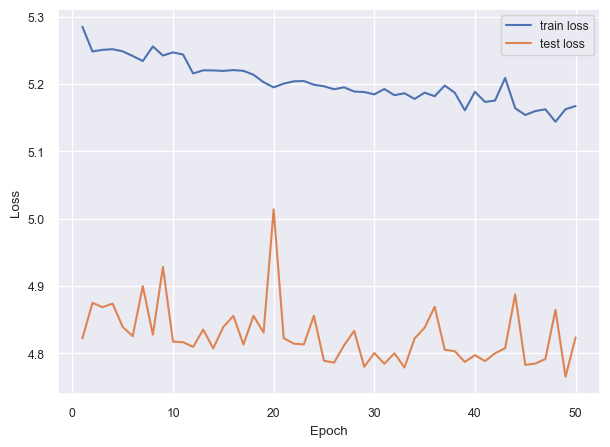

In [68]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

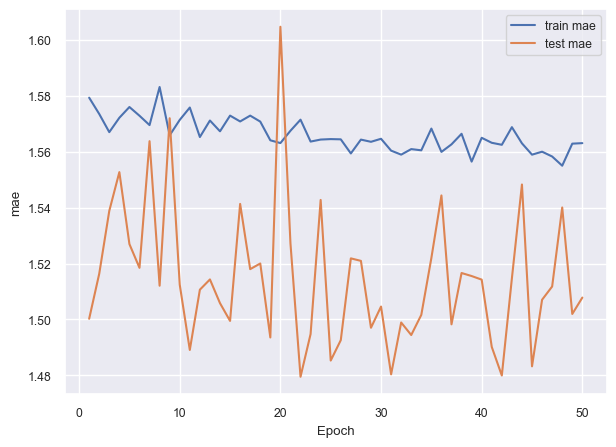

In [70]:
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, mae, label='train mae')
plt.plot(epochs, val_mae, label='test mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend()
plt.show()

Loss 값이 전반적으로 줄어들었으나 변동성이 커짐

## Dropout 적용

In [82]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # L2 정규화 추가
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # L2 정규화 추가
    Dropout(0.3),
    Dense(1)  # 회귀 모델이므로 출력 노드는 1개
])

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 106.8273 - mae: 9.7142 - val_loss: 96.4233 - val_mae: 9.2828
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 93.7714 - mae: 8.9749 - val_loss: 78.1591 - val_mae: 8.1842
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 78.6621 - mae: 8.0116 - val_loss: 53.6504 - val_mae: 6.5165
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 51.3183 - mae: 6.1223 - val_loss: 30.2689 - val_mae: 4.5460
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 35.2805 - mae: 4.7385 - val_loss: 20.6689 - val_mae: 3.5123
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 27.8911 - mae: 4.0560 - val_loss: 17.8775 - val_mae: 3.1753
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 25.9601 - mae: 3.7928 - val_loss: 16.3629 - val_mae: 2.9952
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 22.8285 - mae: 3.5692 - val_loss: 15.1462 - val_mae: 2.8468
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 20.7451

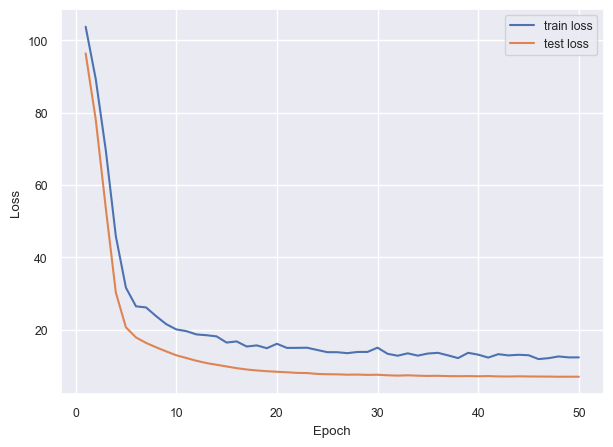

In [84]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

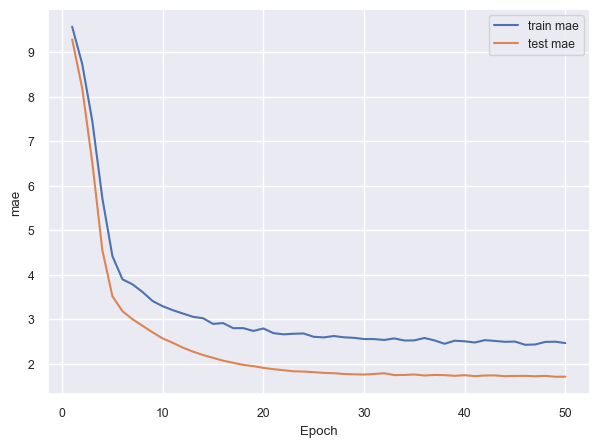

In [86]:
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, mae, label='train mae')
plt.plot(epochs, val_mae, label='test mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.legend()
plt.show()